In [1]:
import pandas as pd

In [2]:
df_FinalCluster_Original = pd.read_csv('df_FinalCluster.csv',
                              dtype={'Distrito':'category','Plazas':'category','Barrio':'category'})

#                               dtype={'Distrito':'category','Gis_X':'category','Gis_Y':'category',
#                                      'Plazas':'category','Longitud':'category','Latitud':'category'})

df_FinalCluster_Original.info()
#df_FinalCluster

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ESTACION             179 non-null    int64   
 1   DEMANDA_RATIO        179 non-null    float64 
 2   Gis_X                179 non-null    float64 
 3   Gis_Y                179 non-null    float64 
 4   Distrito             179 non-null    category
 5   Barrio               179 non-null    category
 6   Plazas               179 non-null    category
 7   Longitud             179 non-null    float64 
 8   Latitud              179 non-null    float64 
 9   Tasa_Paro            179 non-null    float64 
 10  Renta_Media_Persona  179 non-null    float64 
 11  Renta_Media_Hogar    179 non-null    float64 
 12  Poblacion            179 non-null    float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 16.7 KB


In [3]:
df_FinalCluster = df_FinalCluster_Original.copy()

df_FinalCluster = df_FinalCluster.drop(columns='ESTACION')
df_FinalCluster.info()

num_cols = list(df_FinalCluster._get_numeric_data().columns)
cat_cols = list(set(df_FinalCluster.columns) - set(num_cols))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   DEMANDA_RATIO        179 non-null    float64 
 1   Gis_X                179 non-null    float64 
 2   Gis_Y                179 non-null    float64 
 3   Distrito             179 non-null    category
 4   Barrio               179 non-null    category
 5   Plazas               179 non-null    category
 6   Longitud             179 non-null    float64 
 7   Latitud              179 non-null    float64 
 8   Tasa_Paro            179 non-null    float64 
 9   Renta_Media_Persona  179 non-null    float64 
 10  Renta_Media_Hogar    179 non-null    float64 
 11  Poblacion            179 non-null    float64 
dtypes: category(3), float64(9)
memory usage: 15.3 KB


In [4]:
print(num_cols)
print(cat_cols)

['DEMANDA_RATIO', 'Gis_X', 'Gis_Y', 'Longitud', 'Latitud', 'Tasa_Paro', 'Renta_Media_Persona', 'Renta_Media_Hogar', 'Poblacion']
['Distrito', 'Plazas', 'Barrio']


In [5]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

%matplotlib inline

pd.set_option('display.max_rows', 5)

### KNN con 2 variables

In [6]:
# Usando 2 variables
df_knn = df_FinalCluster[['DEMANDA_RATIO', 'Tasa_Paro']]
df_knn

,DEMANDA_RATIO,Tasa_Paro
0,2450.230769,4.309681
1,1273.636364,4.309681
...,...,...
177,868.285714,3.819713
178,693.857143,5.899887


In [7]:
# Escalando variables
scaler = MinMaxScaler()
scale = scaler.fit_transform(df_knn)
df_scale = pd.DataFrame(scale, columns = ['DEMANDA_RATIO', 'Tasa_Paro']);
df_scale

,DEMANDA_RATIO,Tasa_Paro
0,0.562517,0.596006
1,0.248968,0.596006
...,...,...
177,0.140946,0.471529
178,0.094463,1.000000


In [8]:
# Kmeans con 5 clusters
km=KMeans(n_clusters=5)
y_predicted = km.fit_predict(df_knn)
y_predicted

array([2, 3, 1, 3, 3, 2, 3, 3, 2, 3, 0, 3, 2, 3, 0, 3, 1, 3, 2, 3, 3, 3,
       1, 3, 0, 0, 1, 2, 0, 3, 0, 0, 0, 0, 2, 0, 0, 1, 1, 4, 3, 2, 2, 3,
       1, 2, 3, 3, 1, 1, 3, 1, 2, 4, 2, 2, 0, 0, 1, 3, 2, 1, 3, 3, 3, 1,
       0, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 2, 2, 0, 1, 0, 0, 3, 4, 1, 3, 3,
       3, 1, 3, 0, 0, 3, 0, 0, 3, 1, 0, 0, 3, 0, 1, 0, 3, 0, 0, 1, 1, 3,
       3, 0, 1, 0, 0, 3, 0, 3, 3, 3, 3, 0, 2, 2, 3, 1, 1, 1, 3, 2, 1, 0,
       0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 3, 3, 1, 1, 2, 0, 0,
       2, 2, 2, 4, 2, 0, 1, 3, 2, 2, 2, 3, 3, 0, 0, 4, 3, 0, 0, 0, 0, 0,
       0, 0, 0])

In [9]:
km.cluster_centers_

array([[9.08532304e+02, 3.51610299e+00],
       [2.01948352e+03, 3.92908479e+00],
       [2.68455918e+03, 4.11270107e+00],
       [1.49028833e+03, 3.85596979e+00],
       [3.75266667e+03, 4.39477292e+00]])

C:\Users\gonza\AppData\Local\Temp\ipykernel_2188\1530545832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knn['Clusters'] = km.labels_


<AxesSubplot:xlabel='Tasa_Paro', ylabel='DEMANDA_RATIO'>

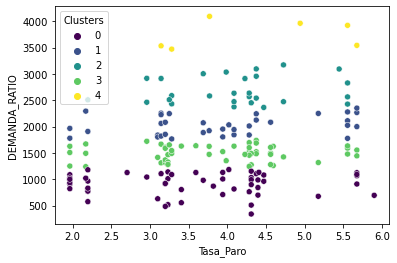

In [10]:
df_knn['Clusters'] = km.labels_
sns.scatterplot(x="Tasa_Paro", y="DEMANDA_RATIO",hue = 'Clusters',  data=df_knn,palette='viridis')

## Número óptimo de clusters

### Método Elbow

In [11]:
K=range(2,20)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

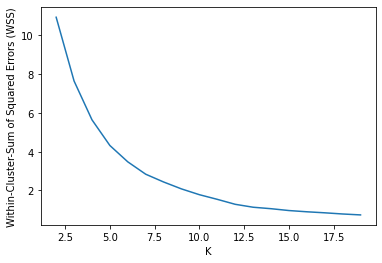

In [12]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

### Silhouette

In [13]:
for i in range(2,20):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(df_scale).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "+str(metrics.silhouette_score(df_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.39868829403287465
Silhouette score for k(clusters) = 3 is 0.39181094377938946
Silhouette score for k(clusters) = 4 is 0.4068540509039899
Silhouette score for k(clusters) = 5 is 0.4278666722124845
Silhouette score for k(clusters) = 6 is 0.4335604972548596
Silhouette score for k(clusters) = 7 is 0.45053647395005586
Silhouette score for k(clusters) = 8 is 0.43963789838706213
Silhouette score for k(clusters) = 9 is 0.4476857144791276
Silhouette score for k(clusters) = 10 is 0.43499765246292166
Silhouette score for k(clusters) = 11 is 0.452237317456789
Silhouette score for k(clusters) = 12 is 0.4371252901717545
Silhouette score for k(clusters) = 13 is 0.4549225464890112
Silhouette score for k(clusters) = 14 is 0.4593184077764681
Silhouette score for k(clusters) = 15 is 0.45103597583421723
Silhouette score for k(clusters) = 16 is 0.4139813358754656
Silhouette score for k(clusters) = 17 is 0.436528373764645
Silhouette score for k(clusters) = 18 is 0.4

## Creación de DF final para KNN

### Transformando categóricas: One Hot Encoder (variables dummies)

In [14]:
df_cat = df_FinalCluster[cat_cols]
df_cat

,Distrito,Plazas,Barrio
0,1,30,01-06
1,1,30,01-06
...,...,...,...
177,4,18,04-04
178,6,18,06-05


In [15]:
OneHot = OneHotEncoder(handle_unknown='ignore', drop='first')
OneHot.fit(df_cat.values)

df_cat_OneHot = OneHot.transform(df_cat.values).toarray()
df_cat_OneHot.shape

(179, 51)

### Concatenación de DF: Numéricos y Categóricas

In [16]:
df_knn_final = pd.concat([df_FinalCluster[num_cols], pd.DataFrame(df_cat_OneHot)], axis=1)
df_knn_final.columns = df_knn_final.columns.astype(str)
df_knn_final.info()
df_knn_final

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 60 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DEMANDA_RATIO        179 non-null    float64
 1   Gis_X                179 non-null    float64
 2   Gis_Y                179 non-null    float64
 3   Longitud             179 non-null    float64
 4   Latitud              179 non-null    float64
 5   Tasa_Paro            179 non-null    float64
 6   Renta_Media_Persona  179 non-null    float64
 7   Renta_Media_Hogar    179 non-null    float64
 8   Poblacion            179 non-null    float64
 9   0                    179 non-null    float64
 10  1                    179 non-null    float64
 11  2                    179 non-null    float64
 12  3                    179 non-null    float64
 13  4                    179 non-null    float64
 14  5                    179 non-null    float64
 15  6                    179 non-null    flo

,DEMANDA_RATIO,Gis_X,Gis_Y,Longitud,Latitud,Tasa_Paro,Renta_Media_Persona,Renta_Media_Hogar,Poblacion,0,...,41,42,43,44,45,46,47,48,49,50
0,2450.230769,440443.61,4474290.65,-3.701998,40.417111,4.309681,17550.00279,35056.88536,7665.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1273.636364,440480.56,4474301.74,-3.701564,40.417213,4.309681,17550.00279,35056.88536,7665.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,868.285714,442830.66,4476215.36,-3.674037,40.434617,3.819713,21251.03416,50063.95065,42445.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178,693.857143,440874.02,4479384.51,-3.697399,40.463029,5.899887,12254.49279,30163.55029,26607.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Reducción de dimensionalidad PCA

In [17]:
df_pca_2 = PCA(n_components=2).fit_transform(df_knn_final)
df_pca_3 = PCA(n_components=3).fit_transform(df_knn_final)
df_pca_4 = PCA(n_components=4).fit_transform(df_knn_final)
df_pca_5 = PCA(n_components=5).fit_transform(df_knn_final)


In [18]:
df_pca_3

array([[ 1.21732786e+04,  2.06772861e+04,  3.41362240e+02],
       [ 1.21615735e+04,  2.06757636e+04,  4.20744197e+02],
       [ 2.05960884e+04, -3.66494633e+03,  2.84240868e+02],
       [ 6.28655584e+03,  3.44441584e+02,  1.25028717e+03],
       [ 2.05573530e+04, -3.71295175e+03,  1.03254332e+03],
       [ 2.20297056e+03,  6.01636900e+03,  1.86390673e+03],
       [ 2.19729245e+03,  6.03299303e+03,  1.46111060e+03],
       [ 2.19425259e+03,  6.02633222e+03,  1.53281935e+03],
       [-1.66427556e+04, -2.75721818e+03, -1.54463394e+02],
       [ 1.36237672e+04,  4.18485669e+03,  2.69244322e+02],
       [ 2.17349541e+03,  6.01632532e+03,  1.47891819e+03],
       [ 2.05668408e+04, -3.70312238e+03,  8.87882243e+02],
       [ 2.05783043e+04, -3.70674068e+03,  1.00951746e+03],
       [ 2.05852301e+04, -3.69405625e+03,  1.04332980e+03],
       [-1.80646909e+03, -2.32175929e+03,  7.51125722e+02],
       [ 2.05784246e+04, -3.69320550e+03,  8.94594846e+02],
       [ 2.05921656e+04, -3.67485907e+03

## Clustering KNN: Métricas Elbow y Silhouette para elegir mejor valor de k

### Usando df_pca_2

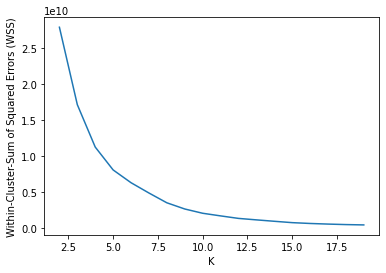

In [19]:
# ELBOW

K=range(2,20)
wss = []

for k in K:
    kmeans=cluster.KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,)
    kmeans=kmeans.fit(df_pca_2)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [20]:
# SILHOUETTE
K=range(2,20)
for k in K:
    labels=KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=200,).fit(df_pca_2).labels_
    print ("Silhouette score for k(clusters) = "+str(k)+" is "+str(metrics.silhouette_score(df_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.31083623677770605
Silhouette score for k(clusters) = 3 is 0.0692284266610742
Silhouette score for k(clusters) = 4 is 0.04307090469661024
Silhouette score for k(clusters) = 5 is 0.05088918454583311
Silhouette score for k(clusters) = 6 is 0.04747420622356616
Silhouette score for k(clusters) = 7 is 0.016970605158093385
Silhouette score for k(clusters) = 8 is 0.03515932628033811
Silhouette score for k(clusters) = 9 is 0.00871533503502329
Silhouette score for k(clusters) = 10 is 0.011302225869602266
Silhouette score for k(clusters) = 11 is -0.02709462651563044
Silhouette score for k(clusters) = 12 is -0.02661350569936161
Silhouette score for k(clusters) = 13 is -0.029596414046865454
Silhouette score for k(clusters) = 14 is -0.03743583243834492
Silhouette score for k(clusters) = 15 is -0.04764591759742556
Silhouette score for k(clusters) = 16 is -0.07206178054623244
Silhouette score for k(clusters) = 17 is -0.12073032954973785
Silhouette score for k(

### Usando df_pca_3

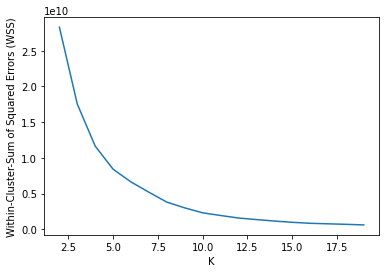

In [21]:
K=range(2,20)
wss = []

for k in K:
    kmeans=cluster.KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,)
    kmeans=kmeans.fit(df_pca_3)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [22]:
# SILHOUETTE
K=range(2,20)
for k in K:
    labels=KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=200,).fit(df_pca_3).labels_
    print ("Silhouette score for k(clusters) = "+str(k)+" is "+str(metrics.silhouette_score(df_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.31083623677770605
Silhouette score for k(clusters) = 3 is 0.0692284266610742
Silhouette score for k(clusters) = 4 is 0.04307090469661024
Silhouette score for k(clusters) = 5 is 0.05088918454583311
Silhouette score for k(clusters) = 6 is 0.04035702541482131
Silhouette score for k(clusters) = 7 is 0.016970605158093385
Silhouette score for k(clusters) = 8 is 0.03515932628033811
Silhouette score for k(clusters) = 9 is 0.0054074909773447885
Silhouette score for k(clusters) = 10 is 0.011302225869602266
Silhouette score for k(clusters) = 11 is -0.02709462651563044
Silhouette score for k(clusters) = 12 is -0.02661350569936161
Silhouette score for k(clusters) = 13 is -0.039534498753771366
Silhouette score for k(clusters) = 14 is -0.04244047794574996
Silhouette score for k(clusters) = 15 is -0.050290113694284225
Silhouette score for k(clusters) = 16 is -0.07206178054623244
Silhouette score for k(clusters) = 17 is -0.09125817610807034
Silhouette score for

### Usando df_pca_4

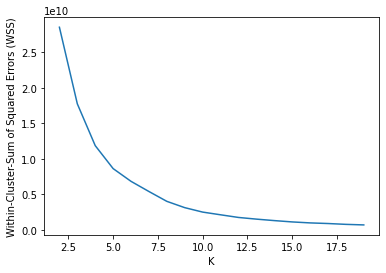

In [23]:
K=range(2,20)
wss = []

for k in K:
    kmeans=cluster.KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,)
    kmeans=kmeans.fit(df_pca_4)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [24]:
# SILHOUETTE
K=range(2,20)
for k in K:
    labels=KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=200,).fit(df_pca_4).labels_
    print ("Silhouette score for k(clusters) = "+str(k)+" is "+str(metrics.silhouette_score(df_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.31083623677770605
Silhouette score for k(clusters) = 3 is 0.0692284266610742
Silhouette score for k(clusters) = 4 is 0.04307090469661024
Silhouette score for k(clusters) = 5 is 0.05088918454583311
Silhouette score for k(clusters) = 6 is 0.04747420622356616
Silhouette score for k(clusters) = 7 is 0.016970605158093385
Silhouette score for k(clusters) = 8 is 0.03515932628033811
Silhouette score for k(clusters) = 9 is 0.00871533503502329
Silhouette score for k(clusters) = 10 is 0.011302225869602266
Silhouette score for k(clusters) = 11 is -0.02709462651563044
Silhouette score for k(clusters) = 12 is -0.02661350569936161
Silhouette score for k(clusters) = 13 is -0.039534498753771366
Silhouette score for k(clusters) = 14 is -0.04244047794574996
Silhouette score for k(clusters) = 15 is -0.053606731323188196
Silhouette score for k(clusters) = 16 is -0.0748187880599096
Silhouette score for k(clusters) = 17 is -0.09394494828654695
Silhouette score for k(

### Usando df_pca_5

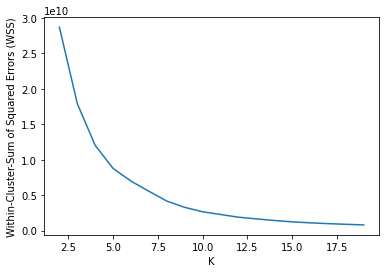

In [25]:
K=range(2,20)
wss = []

for k in K:
    kmeans=cluster.KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,)
    kmeans=kmeans.fit(df_pca_5)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [26]:
# SILHOUETTE
K=range(2,20)
for k in K:
    labels=KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=200,).fit(df_pca_5).labels_
    print ("Silhouette score for k(clusters) = "+str(k)+" is "+str(metrics.silhouette_score(df_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.31083623677770605
Silhouette score for k(clusters) = 3 is 0.0692284266610742
Silhouette score for k(clusters) = 4 is 0.04307090469661024
Silhouette score for k(clusters) = 5 is 0.05088918454583311
Silhouette score for k(clusters) = 6 is 0.04747420622356616
Silhouette score for k(clusters) = 7 is 0.016970605158093385
Silhouette score for k(clusters) = 8 is 0.03515932628033811
Silhouette score for k(clusters) = 9 is 0.0054074909773447885
Silhouette score for k(clusters) = 10 is 0.011302225869602266
Silhouette score for k(clusters) = 11 is 0.007995869100464816
Silhouette score for k(clusters) = 12 is -0.02661350569936161
Silhouette score for k(clusters) = 13 is -0.039534498753771366
Silhouette score for k(clusters) = 14 is -0.03706958625375512
Silhouette score for k(clusters) = 15 is -0.05118393204056472
Silhouette score for k(clusters) = 16 is -0.07206178054623244
Silhouette score for k(clusters) = 17 is -0.07275648369660011
Silhouette score for 

## Clustering con 5 cluster

In [27]:
n_cluster = 5

scaler = MinMaxScaler()
kmeans = KMeans(
               n_clusters=n_cluster,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=200,)

pipeline = make_pipeline(scaler, kmeans)
pipeline

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kmeans',
                 KMeans(max_iter=500, n_clusters=5, n_init=50,
                        random_state=200))])

In [28]:
df_pred_pca2_t = pipeline.fit_transform(df_pca_2)
df_pred_pca2 = pipeline.fit_predict(df_pca_2)
df_pred_pca3 = pipeline.fit_predict(df_pca_3)
df_pred_pca4 = pipeline.fit_predict(df_pca_4)
df_pred_pca5 = pipeline.fit_predict(df_pca_5)


In [29]:
df_pred_pca2_t

array([[0.4188426 , 0.69371664, 0.81636207, 0.74434929, 0.08289707],
       [0.41877333, 0.69363684, 0.81619484, 0.74437082, 0.08273283],
       [0.27043159, 0.31274207, 0.7615219 , 0.15458803, 0.56305806],
       [0.07730425, 0.19967695, 0.53104662, 0.38813817, 0.43272382],
       [0.27067732, 0.31181292, 0.76098783, 0.15399781, 0.56391798],
       [0.10522173, 0.32308988, 0.49596878, 0.52507415, 0.31162625],
       [0.10552759, 0.32348684, 0.49602422, 0.525413  , 0.31127748],
       [0.10547437, 0.32332683, 0.49592212, 0.52533947, 0.31144421],
       [0.41590152, 0.31962696, 0.1650302 , 0.70172178, 0.64549463],
       [0.09931648, 0.33613121, 0.6606185 , 0.37317588, 0.35000733],
       [0.10560678, 0.32308375, 0.49552554, 0.52541886, 0.31177709],
       [0.27064584, 0.31202688, 0.76112196, 0.15410366, 0.56375048],
       [0.27084316, 0.31217805, 0.7613121 , 0.15392739, 0.56389588],
       [0.2707369 , 0.31237246, 0.76140011, 0.15411347, 0.56365011],
       [0.2041833 , 0.1375453 , 0.

In [30]:
df_pred_pca2

array([4, 4, 3, 0, 3, 0, 0, 0, 2, 0, 0, 3, 3, 3, 1, 3, 3, 3, 0, 0, 0, 4,
       0, 0, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 1, 1, 3, 3, 3, 3, 4, 3, 0, 3, 4, 3, 0, 3, 2, 0, 0, 0, 2, 4,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 4, 4, 2, 1, 2, 0, 2, 4, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       4, 0, 0, 1, 4, 1, 1, 1, 1, 1, 0, 4, 0, 0, 2, 0, 4, 1, 1, 0, 0, 2,
       1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2,
       0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       2, 1, 0])

In [31]:
df_pred_pca3

array([3, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 4, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 3, 3, 4, 4, 4, 4, 4, 3, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 3, 2, 2, 1, 0, 3, 2, 2, 2, 2, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0,
       1, 2, 0])

In [32]:
df_pred_pca4

array([3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 3, 3, 2, 2, 2, 0, 2, 3, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 3, 0, 0, 2, 1, 3, 0, 0, 0, 0, 4,
       4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2,
       1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 4, 4, 1, 1, 0, 0, 1, 3, 3, 3,
       2, 4, 4])

In [33]:
df_pred_pca5

array([1, 1, 2, 2, 2, 0, 0, 0, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1,
       2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 2, 1, 2, 0, 2, 3, 0, 0, 0, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 4, 1, 1, 3, 3, 3, 0, 3, 0, 3, 3,
       0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 4, 1, 4, 4, 3, 2, 1, 4, 4, 4, 4, 3,
       3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 2, 3, 3, 0, 3, 2, 2, 0, 0, 3, 3, 2, 2, 4, 4, 0, 0, 0, 0,
       3, 0, 1])

In [34]:
df_final_Clusterizado = pd.concat([df_FinalCluster_Original, pd.DataFrame(df_pred_pca3)], axis=1)
#df_final_Clusterizado.columns['0'] = 'CLUSTER'
df_final_Clusterizado.rename(columns={0: 'CLUSTER'}, inplace=True)
df_final_Clusterizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ESTACION             179 non-null    int64   
 1   DEMANDA_RATIO        179 non-null    float64 
 2   Gis_X                179 non-null    float64 
 3   Gis_Y                179 non-null    float64 
 4   Distrito             179 non-null    category
 5   Barrio               179 non-null    category
 6   Plazas               179 non-null    category
 7   Longitud             179 non-null    float64 
 8   Latitud              179 non-null    float64 
 9   Tasa_Paro            179 non-null    float64 
 10  Renta_Media_Persona  179 non-null    float64 
 11  Renta_Media_Hogar    179 non-null    float64 
 12  Poblacion            179 non-null    float64 
 13  CLUSTER              179 non-null    int32   
dtypes: category(3), float64(9), int32(1), int64(1)
memory usage: 17.4 KB


In [35]:
df_final_Clusterizado.to_csv('../../data/Clusterizada_DataFull.csv', index=False)

In [36]:
df_final_Clusterizado

,ESTACION,DEMANDA_RATIO,Gis_X,Gis_Y,Distrito,Barrio,Plazas,Longitud,Latitud,Tasa_Paro,Renta_Media_Persona,Renta_Media_Hogar,Poblacion,CLUSTER
0,1,2450.230769,440443.61,4474290.65,1,01-06,30,-3.701998,40.417111,4.309681,17550.00279,35056.88536,7665.0,3
1,2,1273.636364,440480.56,4474301.74,1,01-06,30,-3.701564,40.417213,4.309681,17550.00279,35056.88536,7665.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,199,868.285714,442830.66,4476215.36,4,04-04,18,-3.674037,40.434617,3.819713,21251.03416,50063.95065,42445.0,2
178,215,693.857143,440874.02,4479384.51,6,06-05,18,-3.697399,40.463029,5.899887,12254.49279,30163.55029,26607.0,0
